In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from wordcloud import WordCloud 
from nltk.corpus import stopwords 
import nltk

In [4]:
input_filename = "datos_finales_para_ml.csv"
try:
    datos_combinados = pd.read_csv(input_filename)
    print("Datos cargados")
except Exception as e:
    print("Error al cargar")

Datos cargados


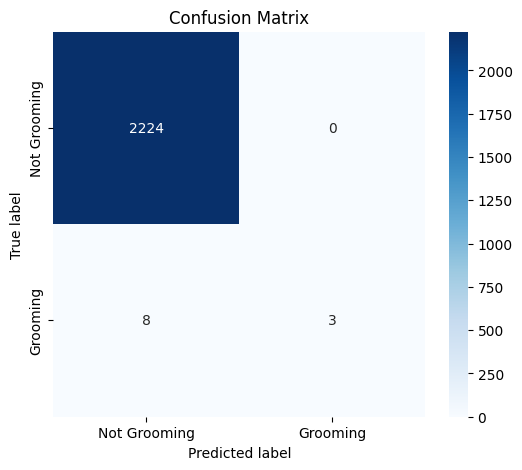


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2224
           1       1.00      0.27      0.43        11

    accuracy                           1.00      2235
   macro avg       1.00      0.64      0.71      2235
weighted avg       1.00      1.00      1.00      2235



In [ ]:

X = datos_combinados['full_chat']
y = datos_combinados['label']

vectorizer = TfidfVectorizer(max_features=10000, stop_words = 'english', sublinear_tf=True)
X_tfidf = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y , test_size=0.2, random_state=42, stratify=y)

model = LogisticRegression (max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

fig, axes = plt.subplots(figsize=(6, 5))
# Dibujamos el heatmap de la matriz de confusión
sns.heatmap(
    cm,                    # Matriz de confusión
    annot=True,                # Muestra los números dentro de cada celda
    fmt="d",                   # Formato entero
    cmap="Blues",              # Colormap azul
    xticklabels=['Not Grooming', 'Grooming'],
    yticklabels=['Not Grooming', 'Grooming'],
    ax=axes
)

axes.set_title("Confusion Matrix")
axes.set_xlabel("Predicted label")
axes.set_ylabel("True label")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))